# Introduction to Matplotlib

## $ \S 1 $ About Matplotlib

__Matplotlib__ is a powerful and versatile plotting library for Python.
It was initially developed by John D. Hunter in the early 2000s and has since
become a widely used tool in the Python ecosystem.  Matplotlib can be used to
generate several kinds of visualizations, such as 2D and 3D graphs, scatter
plots, histograms, bar plots, animations and more.  Moreover, it supports
various output formats and is well integrated with other popular Python
libraries such as _NumPy_, _SciPy_ or _pandas_.  Its ease of use and extensive
customizability allow users to create visually appealing and informative
graphics that facilitate the communication of complex data and insights.
Matplotlib is used across various domains, such as data science, machine
learning, artificial intelligence, finance and academia, for tasks such as data
exploration, model evaluation and result presentation. 

## $ \S 2 $ Drawing the graph of functions of one variable

Suppose we would like to visualize the graph of a real function $ f $, say:
$$
    f(x) = \sin(x)\,.
$$
We begin by importing _NumPy_ and the __Pyplot__ submodule of _Matplotlib_, and defining $ f $ in Python:

In [130]:
# Import NumPy and PyPlot from Matplotlib:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: np.sin(x)    # Define f to be the sine function.

📝 Even though one can import these modules under any name, it is widespread
practice in the Python community to use the aliases `np` for `numpy` and `plt`
for `matplotlib.pyplot`.

We now need to generate an array of $ x $ values inside the domain to be
plotted, say, the interval $ [-4\pi, 4\pi] $, and to compute the corresponding
$ y = f(x) $ values for each of these values of $ x $.

We can use NumPy's `linspace` function to create an array of evenly spaced
values to solve the first task. The syntax is
`numpy.linspace(start, stop, num=50)` (in addition to some other optional
arguments which will be ignored). Here:
* `start` is the starting value of the array.
* `stop` is the end value of the array.
* `num` (default $ = 50 $) is the number of evenly spaced values to be generated within the interval.

__Example:__

In [131]:
xs = np.linspace(0, 1, 11)     # Generate 11 evenly spaced points in [0, 1].
print(xs)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In our case, we will let $ x $ range over the interval $ [-2\pi, 2\pi] $, hence we set:

In [132]:
xs = np.linspace(-2 * np.pi, 2 * np.pi, 201)
ys = f(xs)

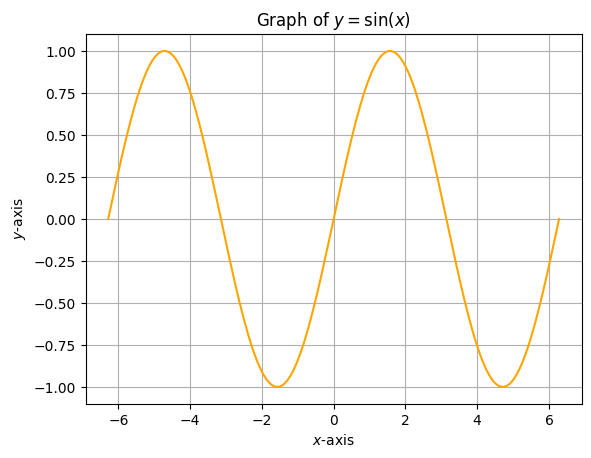

In [133]:
# Recall that 'plt' is the name under which matplotlib.pylot was imported.
# Generate a plot using all pairs (x, y) for x in `xs` and y in `ys`:
plt.plot(xs, ys, linestyle='solid', color='orange') 
plt.xlabel("$ x $-axis")    # Label the x-axis (optional).
plt.ylabel("$ y $-axis")    # Label the y-axis (optional).
plt.title("Graph of $ y = \sin(x) $")     # Choose a title (optional).
plt.grid(True)              # Add a rectangular grid as background (optional).
plt.show()                  # Display the resulting diagram.

You can replace the sine function with any other real function of one variable
and follow the same steps to draw its graph.

📝 The arrays `xs` and `ys` must have exactly the same length; in our case,
since `ys` was defined as consisting of all values of the form $ f(x) $ for $ x
$ in `xs`, this is automatically true. The graph is drawn by connecting
successive points $ (x, y) $ by line segments.  Thus, to obtain a smooth line,
it is important that the length of `xs` and `ys` be sufficiently large.
Investigate what happens if you instead lower the number of points in `xs` to,
say, $ 10 $ in our example.

📝 Note that the statement `plt.plot(xs, ys)` only creates the line plot, but
does not cause it to be displayed. The `plt.show()` function is the one
responsible for opening a window, rendering the graph, and displaying it to the
user. It also starts the event loop that allows for interaction with the plot,
such as zooming or panning.  However, when using Matplotlib in an interactive
environment such as a Jupyter Notebook, the graph might still be displayed
without calling `plt.show()`, because these environments are configured to
automatically render the plots inline. In such cases, you may see the plot
immediately after executing the `plt.plot(xs, ys)` line. 

__Exercise (drawing and customizing graphs of functions of one variable):__ Draw
and customize the graphs of:

(a) The function $ f(x) = x^3 - 3x^2 - 9x + 6 $ over the interval $ [-4, 6] $;
with the line style set to `dotted` and the color to `red`; labeling the
$ x $-axis by '$ x $' and the $ y $-axis by '$ f(x) $'; displaying a rectangular grid in
the background; setting the plot title to "Cubical function:
$ f(x) = x^3 - 3x^2 - 9x + 6 $".

(b) The function $ g(x) = \sin(x)\,\exp(-0.1\, x) $ over the interval
$ [0, 100] $; with the line style set to `solid`, the color to `green` and
the width to $ 1 $; labeling the $ x $-axis by '$ x $' and the $ y $-axis by '$
y = f(x) $'; displaying a rectangular grid in the background; setting the plot
title to "Damped oscillation: $ g(x) = \sin(x)\,\exp(-0.1\,x) $". To change the
line width, add the option `linewidth=1` to `plt.plot`.

(c) The function $ h(x) = \log x $ over the interval $ x \in [0.1, 10] $ for
$ y $ in $ [-2, 2.5] $; with the line style set to `dashed` and the color to
`blue`; labeling the $ x $-axis by "$ x $-axis" and the $ y $-axis by "$ y
$-axis"; _not_ displaying a rectangular grid in the background; setting the plot
title to "Graph of the logarithmic function $ y = \log x $". To set the limits
of the $ x $- and $ y $-axes to be displayed, use `plt.xlim(0.1, 10)` and
similarly for $ y $.

## $ \S 3 $ Drawing the graphs of two or more functions in a single diagram

To create a plot of the graph of two or more functions using Matplotlib, we can
simply call `plt.plot()` multiple times before calling `plt.show()`. 
Each call to `plt.plot()` adds a new line to the plot. Additionally, we can
individually customize the appearance of each graph and add a legend to the plot
for better readability.

Here's an example of how to plot the functions
$$
f(x) = \frac{x^3\cos x}{10} + 2x^2 \sin x - 1 \quad \text{e} \quad g(x) = x^2\sin(2x) + 3x - 2\,.
$$

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos
f = lambda x: x**3 * cos(x) / 10 + 2 * x**2 * sin(x) - 1
g = lambda x: x**2 * sin(2 * x) + 3 * x - 2

Now we need to generate an array containing the $ x $-coordinates of the points to be displayed.
As before, this can be easily achieved with the help of `numpy.linspace`. Further, we need
to generate two independent arrays `ys_f` and `ys_g` containing the corresponding $ y $-coordinates
of points on the graphs of $ f $ and $ g $:

In [135]:
xs = np.linspace(-3, 3, 201)
ys_f = f(xs)
ys_g = g(xs)

📝 One can also draw the graph of the first function over an interval and the
graph of the second function over another interval by creating two separate
arrays to hold the corresponding values of $ x $.

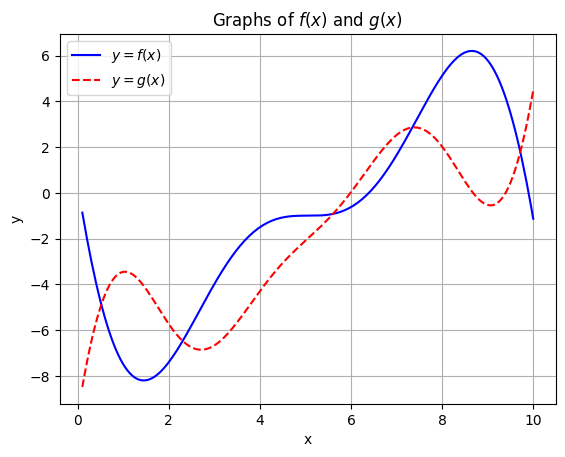

In [43]:
# Creating the plot of the graphs of f and g:
plt.plot(xs, ys_f, label="$ y = f(x) $", color="blue", linestyle="-") 
plt.plot(xs, ys_g, label="$ y = g(x) $", color="red", linestyle="--")
# Let's now customize the plot by adding labels, a title, a grid, and a legend:
plt.xlabel("x")    # Labeling the x-axis.
plt.ylabel("y")    # Labeling the y-axis.
plt.title("Graphs of $f(x)$ and $g(x)$")  # Specyifying a title for the plot.
plt.grid(True)     # Draw a rectangular grid in the background.
plt.legend()       # Add a legend to help us identify the two lines.
plt.show()         # Display the plot.


__Exercise (drawing and customizing graphs of several functions):__ In the same plot,
draw and customize the graphs of:

## $ \S 4 $ Creating dispersion (scatter) plots

A __dispersion plot__, also known as a __scatter plot__, is a graphical
representation that displays the relationship between two variables by plotting
individual data points. Each such data point may represent an observation or a
sample, for example. Dispersion plots can help us identify trends, correlations,
or patterns in the data, and they are particularly useful for exploring the
relationships between continuous variables.

Here's an example of how to generate a dispersion plot using Matplotlib,
involving data on the boiling points and melting points of various chemical
elements to create a scatter plot.



In [136]:
# Import Numpy and Pyplot:
import numpy as np
import matplotlib.pyplot as plt


# Data source: https://pubchem.ncbi.nlm.nih.gov/
# Creating an array to store the melting points (in Kelvin):
melting_points = np.array([
    273.15,  # Water (H2O)
    54.36,   # Helium (He)
    317.43,  # Argon (Ar)
    1156,    # Sodium (Na)
    933.47,  # Aluminum (Al)
    1811,    # Calcium (Ca)
])
# Creating an array to store the boiling points (in Kelvin):
boiling_points = np.array([
    373.15,  # Water (H2O)
    4.22,    # Helium (He)
    87.3,    # Argon (Ar)
    1156,    # Sodium (Na)
    2792,    # Aluminum (Al)
    2671,    # Calcium (Ca)
])
# Creating a list to help us identify which point corresponds to which element:
element_names = [
    "Water (H2O)",
    "Helium (He)",
    "Argon (Ar)",
    "Sodium (Na)",
    "Aluminum (Al)",
    "Calcium (Ca)",
]

To create the dispersion plot, we can use Matplotlib's `scatter` function:

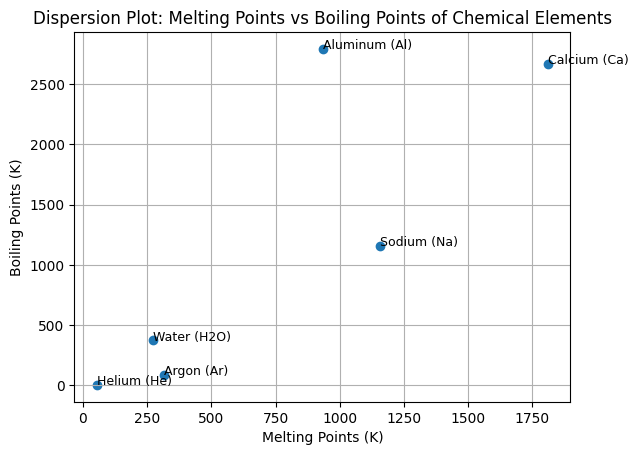

In [137]:
# Generate the plot consisting of pairs (melting, boiling) for each element:
plt.scatter(melting_points, boiling_points)
# Annotate each point to help us identify them:
for i, element in enumerate(element_names):
    plt.annotate(element, (melting_points[i], boiling_points[i]), fontsize=9)

plt.xlabel("Melting Points (K)")    # Label the x-axis.
plt.ylabel("Boiling Points (K)")    # Label the y-axis.
plt.title("Dispersion Plot: Melting Points vs Boiling Points "
          "of Chemical Elements")   # Set the title.
plt.grid(True)                      # Show a rectangular grid in the background.
plt.show()                          # Display the plot.

## $ \S 5 $ Creating histograms

A __histogram__ is a graphical representation that displays the distribution of
a dataset by dividing it into a series of bins and counting the number of data
points that fall into each bin. It is particularly useful for visualizing the
underlying distribution of a continuous variable or for exploring the frequency
of events in discrete data.

In the following example we will generate a histogram using $ 1000 $ randomly
generated values taken from a population following a normal distribution, 
divided into $ 30 $ bins.  To plot the histogram, we use the `hist` function.

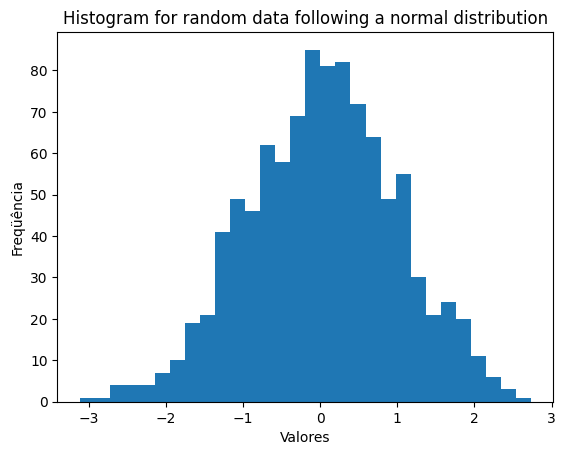

In [138]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a sample of $ 1000 $ random numbers from a normal distribution:
data = np.random.randn(1000)
# Generating the histogram with a division into 30 bins:
plt.hist(data, bins=30)
plt.xlabel("Valores")       # Labeling the x-axis.
plt.ylabel("Freqüência")    # Labeling the y-axis.
# Setting the title:
plt.title("Histogram for random data following a normal distribution")
plt.show()    # Display the plot.

__Example:__ In this example we will plot the distribution of allele frequencies
in a population as a histogram.

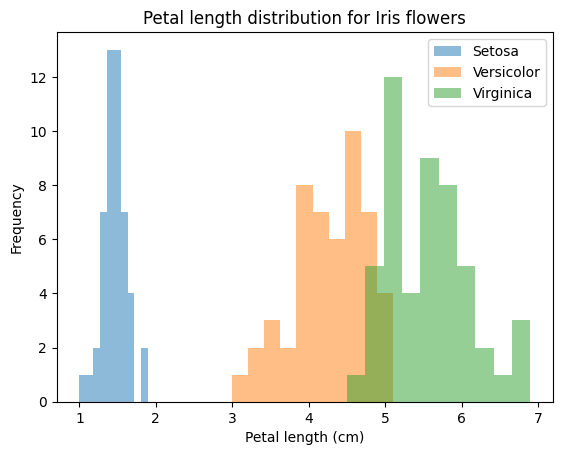

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']

plt.hist(setosa_petal_length, bins=10, alpha=0.5, label='Setosa')
plt.hist(versicolor_petal_length, bins=10, alpha=0.5, label='Versicolor')
plt.hist(virginica_petal_length, bins=10, alpha=0.5, label='Virginica')

plt.xlabel("Petal length (cm)")
plt.ylabel("Frequency")
plt.title("Petal length distribution for Iris flowers")

plt.legend()
plt.show()    # Display the plot.

## $ \S 6 $ Visualizing the 3D-graph and contour plot of a function of two real variables
Suppose that we would like to visualize the graph of the function
$$ 
f(x, y) = x^3 - 3xy^2\,.
$$

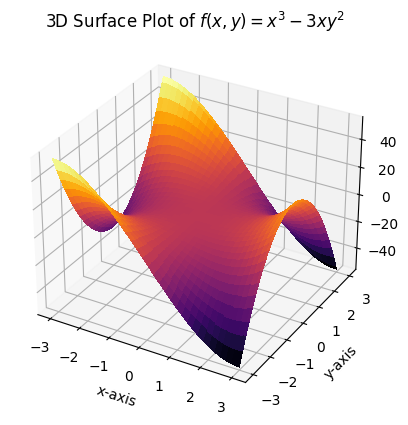

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f(x, y):
    return x**3 - 3 * x * y**2


x = np.linspace(-3, 3, 101)
y = np.linspace(-3, 3, 101)
x, y = np.meshgrid(x, y)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="inferno", linewidth=0, antialiased=False)

ax.set_xlabel("x-axis")       # Labeling the x-axis.
ax.set_ylabel("y-axis")       # Labeling the x-axis.
ax.set_zlabel("z-axis")       # Labeling the x-axis.
# Setting the title:
ax.set_title("3D Surface Plot of $ f(x, y) = x^3 - 3xy^2 $")

plt.show()    # Display the plot.

A __contour plot__ is a 2D representation of a 3D surface plot that displays contour
lines for different values of the function. Here's how we could create a contour
plot of the same function 
$$
    g(x, y) = x\,\exp\big(-x^2 - y^2\big)\,.
$$

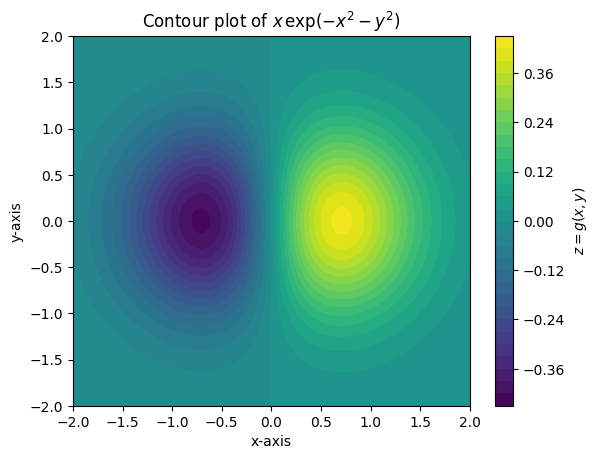

In [140]:
import numpy as np
import matplotlib.pyplot as plt


def g(x, y):
    return x * np.exp(-x**2 - y**2)


x = np.linspace(-2, 2, 101) 
y = np.linspace(-2, 2, 101)
x, y = np.meshgrid(x, y)

z = g(x, y)

plt.contourf(x, y, z, levels=30, cmap='viridis')
# By increasing or decriasing the number of levels we can obtain
# a plot that is more or less brittle, respectively.
plt.xlabel("x-axis")       # Labeling the x-axis.
plt.ylabel("y-axis")       # Labeling the x-axis.
# Setting a title:
plt.title("Contour plot of $ x\,\exp(-x^2 - y^2) $")
plt.colorbar(label="$ z = g(x, y) $")       # Labeling the color bar.

plt.show()    # Display the plot.
